<a href="https://colab.research.google.com/github/jaylinbarry/Stat/blob/main/Jaylin_Barry_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [8]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb
#importing other codes to use in ours today

In [9]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#defining all parts of the url we are going to upload including all of the data and defining the true and false aspects of the data 

In [10]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();
#defining the labels of the data and the model as the defoult data

In [11]:
url = "https://docs.google.com/presentation/d/1Jr7VxmcMSn9Mu_52d_YWBFH5-iawehFYBk8BYDMkEVY/edit#slide=id.p"
#imputting our url with all of the data

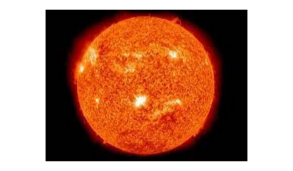

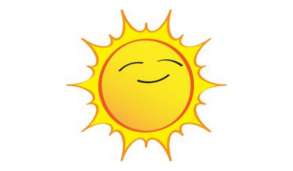

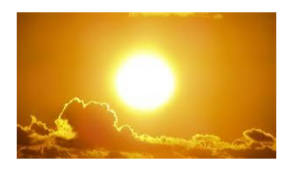

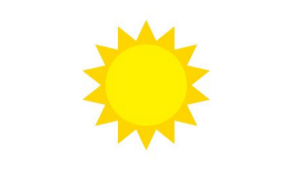

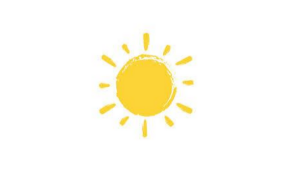

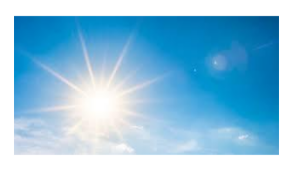

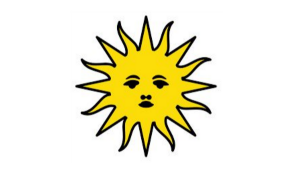

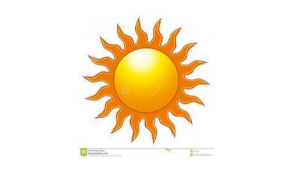

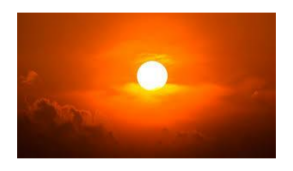

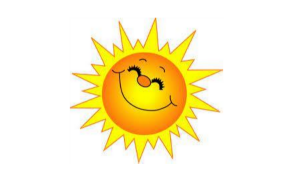

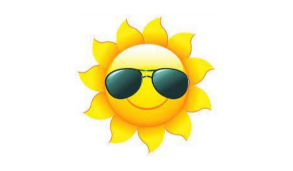

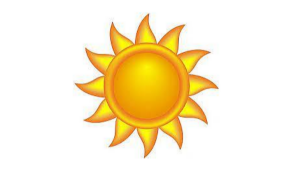

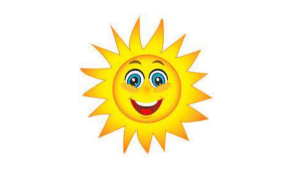

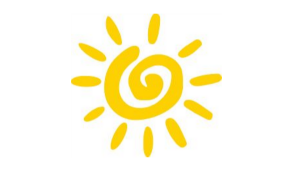

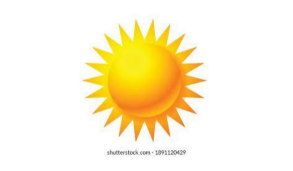

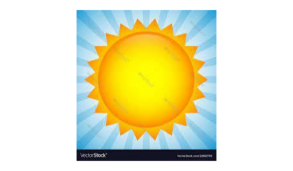

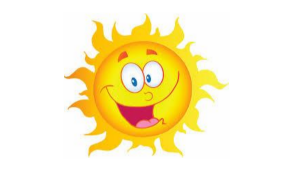

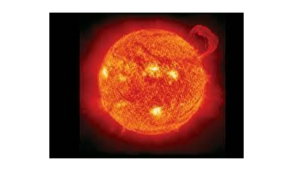

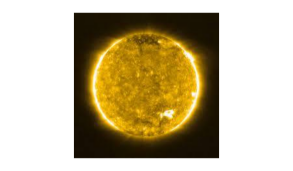

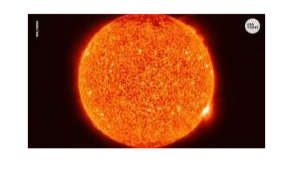

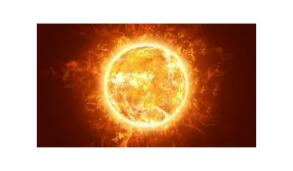

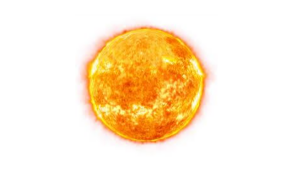

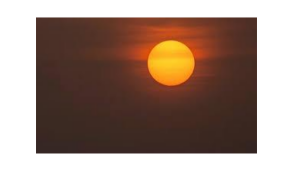

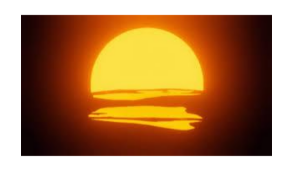

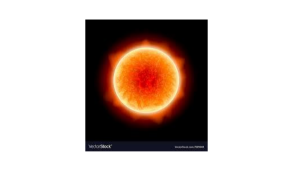

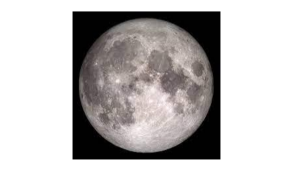

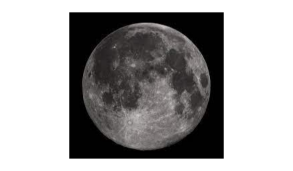

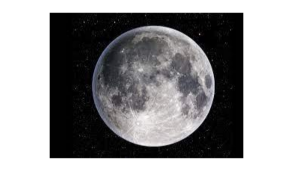

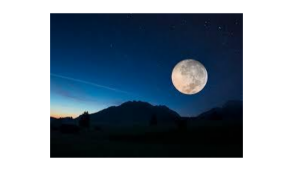

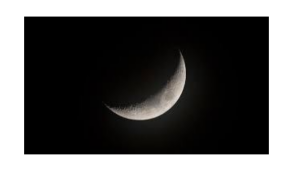

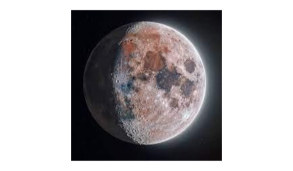

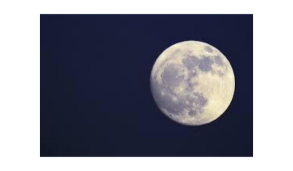

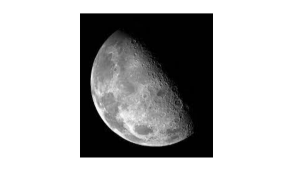

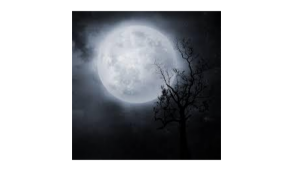

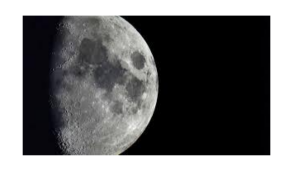

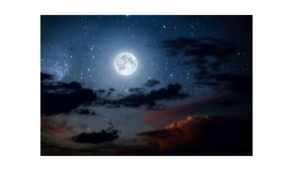

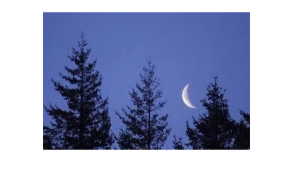

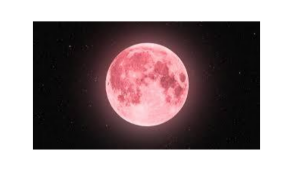

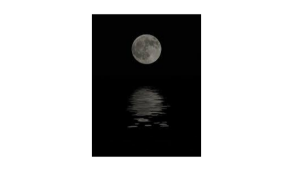

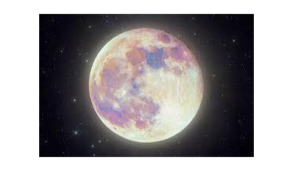

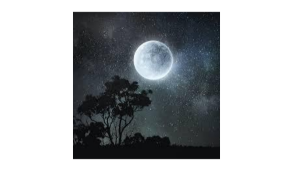

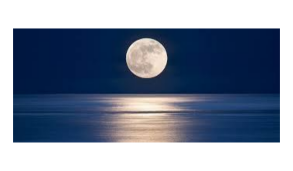

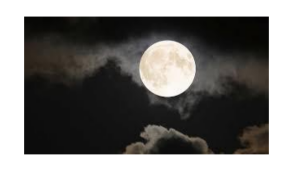

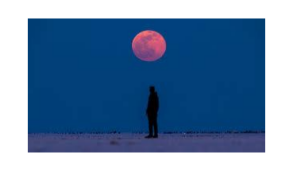

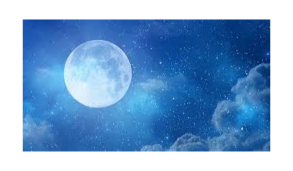

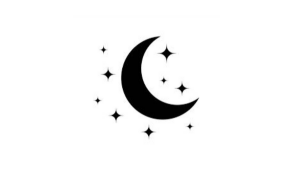

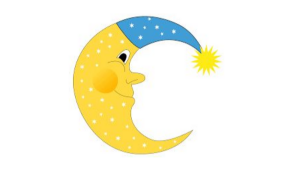

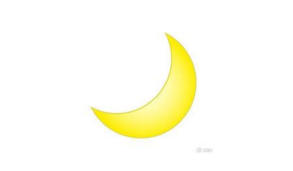

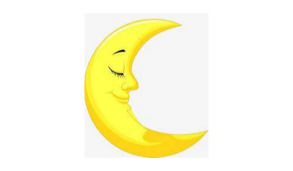

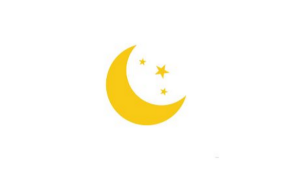

In [12]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)
#outputting the images from the url we inputted above

In [14]:
images.shape
#outputting the images shape and dimensions

torch.Size([50, 3, 224, 224])

In [25]:
model(images)
#outputting the information from the model images 

tensor([[-1.0637,  6.7972, -6.5975,  ...,  9.1249,  3.1330,  2.4455],
        [-5.1783,  1.5016, -2.3124,  ..., -0.5513,  0.2133,  1.8055],
        [-3.4949,  3.3455, -4.9503,  ..., -2.6394,  1.5164,  2.7036],
        ...,
        [-2.1775,  1.7166, -3.7165,  ..., -0.8177,  2.4323,  4.9564],
        [-4.8882,  1.2334, -3.6784,  ..., -1.5291,  1.5181,  6.0837],
        [-1.8359,  1.7792, -4.3625,  ..., -1.5836,  3.4562,  2.9408]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [26]:
y = model(images)
#defining y as the model images data from above

In [27]:
y.shape
#outputting y shape from the data

torch.Size([50, 1000])

In [28]:
guesses = torch.argmax(y, 1).cpu().numpy()
#defining the guesses as the torch argmax including data from the cpu code and numpy code

In [29]:
for i in list(guesses):
    print(labels[i])
    #outputting the guesses and labels from the list and print

orange
wall clock
candle, taper, wax light
daisy
lemon
seashore, coast, seacoast, sea-coast
wall clock
centipede
candle, taper, wax light
wall clock
pinwheel
orange
pinwheel
nipple
buckeye, horse chestnut, conker
ant, emmet, pismire
shower cap
traffic light, traffic signal, stoplight
nematode, nematode worm, roundworm
orange
nematode, nematode worm, roundworm
orange
ping-pong ball
car mirror
matchstick
golf ball
gong, tam-tam
Petri dish
golf ball
nematode, nematode worm, roundworm
pick, plectrum, plectron
golf ball
pick, plectrum, plectron
jellyfish
golf ball
jellyfish
alp
pick, plectrum, plectron
analog clock
jellyfish
jellyfish
cleaver, meat cleaver, chopper
ping-pong ball
joystick
jellyfish
wall clock
pencil sharpener
banana
banana
nipple


In [30]:
Y = np.zeros(50,)
Y[25:] = 1
#defining y in the data as the zeros 

In [31]:
Y
#outputting the y value we defined above

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
X = y.detach().cpu().numpy() 
#defining x in the data

In [33]:
X.shape
#outputting the shape and dimensions of the x values

(50, 1000)

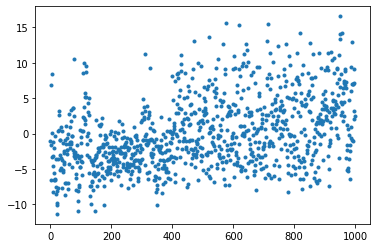

In [34]:
plt.plot(X[0],'.')
#graphing the x value data in a plot graph

In [36]:
X[0]
#outputting the values of x in regards to 0

array([-1.06371796e+00,  6.79721975e+00, -6.59754181e+00, -1.56369531e+00,
       -3.25248361e+00,  8.40995312e+00,  8.68185163e-02, -4.58202934e+00,
       -3.24160147e+00, -8.21094990e+00, -1.14637053e+00, -6.57365990e+00,
       -1.98087883e+00, -5.57027245e+00, -6.37873936e+00, -3.45193654e-01,
       -6.62500715e+00, -7.53775549e+00, -3.64242411e+00, -8.57517815e+00,
       -1.01712065e+01, -1.13655510e+01, -9.75852394e+00, -8.12226105e+00,
       -7.69929647e+00, -3.61326647e+00,  3.43760341e-01,  2.55765653e+00,
        3.25102806e+00,  5.45642734e-01, -3.04268098e+00, -8.57146263e-01,
       -9.15407717e-01, -5.10433626e+00,  9.53038156e-01, -3.48200417e+00,
       -4.88084698e+00, -3.72319746e+00,  3.44233781e-01, -7.65586424e+00,
       -1.37249804e+00, -5.44949961e+00, -5.22133398e+00, -2.68549633e+00,
       -4.34421587e+00, -3.97630644e+00, -2.43929195e+00, -9.56740439e-01,
       -6.96902561e+00, -8.68270206e+00, -7.00105906e+00, -1.47999978e+00,
        1.06066418e+00, -

In [38]:
np.argmax(X[0])
#outputting the values of argmax as defined above in regards to x of 0

950

In [41]:
labels[948]
#outputting the label of the data from point 948

'Granny Smith'

In [42]:
top_ten = np.argsort(X[0])[::-1][0:10]
#defining top ten as the arg sort 

In [44]:
for i in top_ten:
    print(labels[i])
    #outputting the values from the labels data as defined above

orange
gong, tam-tam
pick, plectrum, plectron
lampshade, lamp shade
spotlight, spot
pomegranate
lemon
croquet ball
fig
Petri dish


In [46]:
labels
#outputting all labels as defined above

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 12.,  86., 220., 236., 163., 130.,  71.,  53.,  22.,   7.]),
 array([-11.365551  ,  -8.5702305 ,  -5.77491   ,  -2.9795895 ,
         -0.18426895,   2.6110516 ,   5.406372  ,   8.201693  ,
         10.997013  ,  13.792334  ,  16.587654  ], dtype=float32),
 <a list of 10 Patch objects>)

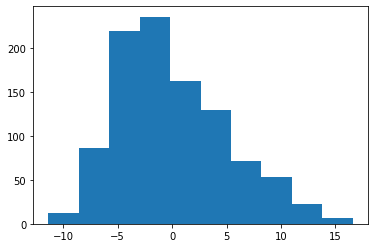

In [48]:
plt.hist(X[0])
#graphing the data from above into a histogram

In [49]:
X = GPU_data(X)
Y = GPU_data(Y)
#defining x and y values

In [51]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s
    #defining softmax including its variables, ie s1 and s

In [52]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  
    #defiining the cross entropy values

In [53]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)
    #defining the random truncate random numbers

In [54]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z
    #defining the normal truncated values

In [55]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [56]:
X.shape

torch.Size([50, 1000])

In [57]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [58]:
def model(x,w):

    return x@w[0]

In [59]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [60]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: ERROR API key must be 40 characters long, yours was 99


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-9-8e07aa3a878d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/